# 📚 4. Подготовка данных к обучению

## 🎯 Цели этапа
1. Разделение данных на признаки и целевую переменную
2. Стратифицированное разделение на train/test выборки
3. Масштабирование числовых признаков
4. Балансировка классов для борьбы с дисбалансом
5. Сохранение подготовленных данных

## 📊 Исходные данные
- Обработанный датасет: 23 признака, 10,002 наблюдений
- Дисбаланс классов: 79.6%/20.4% (Exited: 0/1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

os.chdir('..')

sys.path.insert(0, 'src')

from data_preparation import PrepareData

os.chdir('notebooks')

df_preprocessed = pd.read_csv('../data/bank_churn_preprocessing.csv')
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CreditScore                    10002 non-null  int64  
 1   Gender                         10002 non-null  int64  
 2   Age                            10002 non-null  float64
 3   Tenure                         10002 non-null  int64  
 4   Balance                        10002 non-null  float64
 5   NumOfProducts                  10002 non-null  int64  
 6   HasCrCard                      10002 non-null  float64
 7   IsActiveMember                 10002 non-null  float64
 8   EstimatedSalary                10002 non-null  float64
 9   Exited                         10002 non-null  int64  
 10  Is_Senior_Active               10002 non-null  int64  
 11  Active_With_Multiple_Products  10002 non-null  int64  
 12  Value_Client                   10002 non-null 

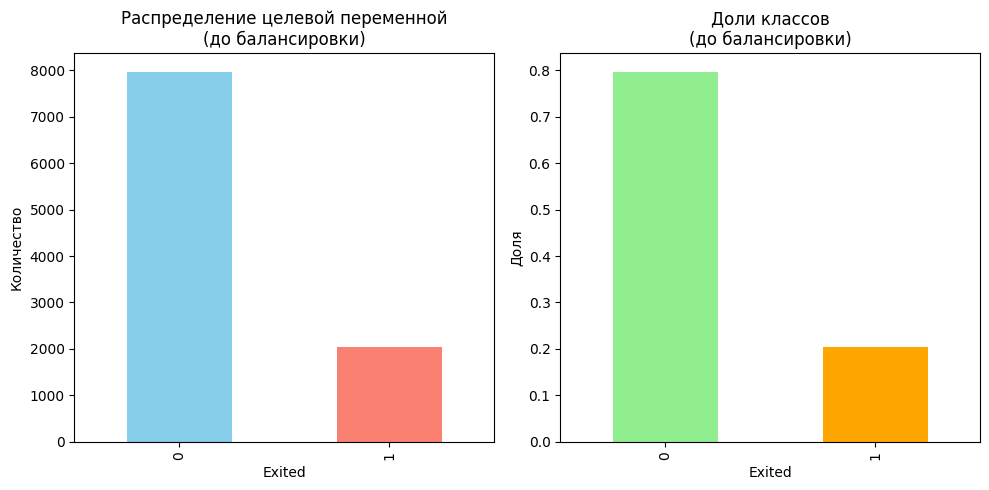

📈 Статистика по целевой переменной:
Класс 0 (лояльные): 7964 (79.6%)
Класс 1 (ушедшие): 2038 (20.4%)


In [2]:
def display_disbalance(column):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    column.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Распределение целевой переменной\n(до балансировки)')
    plt.xlabel('Exited')
    plt.ylabel('Количество')

    plt.subplot(1, 2, 2)
    column.value_counts(normalize=True).plot(kind='bar', color=['lightgreen', 'orange'])
    plt.title('Доли классов\n(до балансировки)')
    plt.xlabel('Exited')
    plt.ylabel('Доля')

    plt.tight_layout()
    plt.show()

    class_distribution = column.value_counts()
    print("📈 Статистика по целевой переменной:")
    print(f"Класс 0 (лояльные): {class_distribution[0]} ({class_distribution[0]/len(column)*100:.1f}%)")
    print(f"Класс 1 (ушедшие): {class_distribution[1]} ({class_distribution[1]/len(column)*100:.1f}%)")

display_disbalance(df_preprocessed['Exited'])

In [3]:
preparing = PrepareData(df_preprocessed)

X_train, X_test, y_train, y_test = preparing.preparing()
X_train

✅ Данные и объекты сохранены в ../data/processed


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Is_Senior_Active,...,New_HighRisk,German_Female_Risk,Geo_France,Geo_Germany,Geo_Spain,AgeGroup_18-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_60+
0,0.225564,0,-0.166667,-0.600000,0.159613,1.000000,1.0,1.000000,-0.846115,0,...,0,1,0,1,0,0,1,0,0,0
1,1.052632,1,-0.583333,0.600000,-0.759413,1.000000,1.0,0.000000,1.021681,0,...,0,0,1,0,0,1,0,0,0,0
2,1.150376,0,0.666667,0.800000,0.152938,0.000000,1.0,0.000000,0.917265,0,...,0,1,0,1,0,0,0,1,0,0
3,0.443609,1,1.166667,0.400000,-0.759413,2.000000,1.0,0.000000,-0.626367,0,...,0,0,1,0,0,0,0,0,1,0
4,0.774436,0,0.500000,0.800000,-0.759413,1.000000,1.0,0.000000,-0.834302,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12737,0.854766,0,0.880713,0.843144,-0.047798,0.000000,1.0,0.000000,0.348169,0,...,0,1,0,1,0,0,0,1,0,0
12738,-0.450187,1,2.069346,-0.550356,-0.010893,0.000000,1.0,0.000000,-0.067265,0,...,0,0,0,0,1,0,0,0,0,1
12739,0.506320,0,1.785247,0.249460,-0.759413,0.917567,1.0,1.000000,0.589019,1,...,0,0,0,0,1,0,0,0,1,0
12740,-0.781363,1,1.313804,0.187478,0.260137,0.000000,1.0,0.000000,0.666200,0,...,0,0,0,1,0,0,0,0,1,0


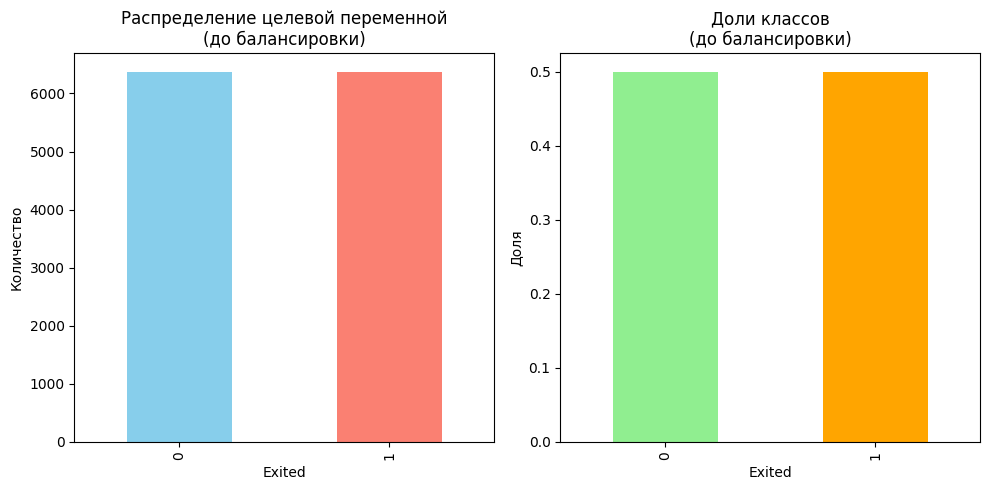

📈 Статистика по целевой переменной:
Класс 0 (лояльные): 6371 (50.0%)
Класс 1 (ушедшие): 6371 (50.0%)


In [4]:
display_disbalance(y_train)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12742, 22), (2001, 22), (12742,), (2001,))

## 🔧 Реализованные методы подготовки

### **1. Стратифицированное разделение на train/test**

```python
- test_size: 0.2 (20% данных в тестовую выборку)
- random_state: 42 (воспроизводимость результатов)
- stratify: y (сохранение распределения классов)
```

Для того, чтобы наша модель смогла понять устройство наших данных, мы должны разделить наш датасет на обучающую и тестовую выборки. На тренировочкой выборке модель "обучается", ищет закономерности и зависимости в данных, а на тестовой выборке модель по полученным данным строит предсказания, исходя из знаний, которые она получила в ходе обучения. Размер тренировочной выборки - 80%, а тестовой - 20% от общего количества записей датасета. Данное разделение является наиболее распространенным правилом, которое хорошо проверено уже на многих примерах. 80% train-выборки (12742 примеров) достаточно для того, чтобы модель эффективно обучилась, выявила закономерности и показала хороший результат на метриках. 20% (2001) test-выборки достаточно для объективной оценки качества модели.

Для того, чтобы каждый раз модель не обучалась на новых данных, мы задаем параметр random_state, с помощью которого мы будем иметь дело с одними и теми же данными.

Также, для того, чтобы в обучающую выборку попало ровное количество записей как ушедших, так и лояльных клиентов (`Exited=1` и `Exited=0`), мы задаем параметр stratify=y, где y - наш таргет (`Exited`)

**Результат:**
- Train set: 8,001 наблюдений (80%)
- Test set: 2,001 наблюдение (20%)
- Сохранено оригинальное распределение классов в обеих выборках

### **2. Масштабирование числовых признаков**
```python
# Использован RobustScaler:
- Устойчив к выбросам (использует медиану и IQR)
- Не требует нормального распределения данных
- Масштабируемые признаки: 'CreditScore', 'Age', 'Balance', 'EstimatedSalary'
```

По полученным на этапе EDA результатам мы масштабировали данные с помощью RobustScaler. Использовали этот метод масштабирования, посклольку наши данные распределены не нормально, данный метод устойчив к выбросам.

**Преимущество:** Сохранение структуры данных при наличии выбросов.

### **3. Балансировка классов методом SMOTE**
```python
# SMOTE
- Создает синтетические примеры minority класса
- Не просто дублирует существующие данные
- Сохраняет информацию из majority класса
```

В ходе анализа распределения целевого признака (`Exited`), мы выяснили, что количество ушедших клиентов меньше, чем количество лояльных, поэтому было принятно решение использование алгоритм oversampling - SMOTE, который создает искусственные записи меньшего класса (в нашем случае тех, кто перестает пользоваться услугами банка), при этом записи, которые соответствуют большего классу (лояльных клиентов банка), остаются не тронутыми. Стоит отметить, что алгоритм балансировки классов применялся ТОЛЬКО к тренировочной выборке, поскольку нам важно, чтобы данные, которые поступали в качестве тестовых были различными: в них может присутствовать дисбаланс классов (в реальной жизни люяльных клиентов обычно больше), а может и получиться равное распределение.

**Результат балансировки:**
- До: {0: 7964, 1: 2038} (80%/20%)
- После: {0: 6371, 1: 6371} (50%/50%)

### **4. Сохранение подготовленных данных**
```python
# Данные сохранены в формате Pickle:
- X_train.pkl, X_test.pkl - матрицы признаков
- y_train.pkl, y_test.pkl - целевые переменные  
- scaler.pkl - обученный scaler для новых данных
- feature_names.pkl - названия признаков
```

**Преимущества Pickle:**
- Сохранение типов данных и структур
- Быстрая загрузка/сохранение
- Компактный размер файлов

Тренировочные и тестовые выборки мы сохранили в формате pickle, поскольку это ускоряет загрузку и сохранение выборок, а также позволяет хранить файлы в компактном размере. Также были сохранен метод масштабирования и название наших признаков, в случае если нам понадобиться дообучать модели ML

---

## 📈 Визуализация результатов

### **Распределение классов до балансировки:**
```
Класс 0 (лояльные): 7964 (79.6%)
Класс 1 (ушедшие): 2038 (20.4%)
```

### **Распределение классов после балансировки:**
```
Класс 0 (лояльные): 6371 (50.0%)
Класс 1 (ушедшие): 6371 (50.0%)
```

---

## 🎯 Ключевые особенности реализации

### **Архитектура класса `PrepareData`:**
- Инкапсуляция всей логики подготовки данных
- Состояние объекта сохраняет все промежуточные результаты
- Возможность переиспользования на новых данных

### **Обработка дисбаланса:**
- Тестовые данные НЕ балансируются (реалистичная оценка)
- Тренировочные данные балансируются для улучшения обучения моделей
- SMOTE обеспечивает разнообразие синтетических примеров

### **Воспроизводимость:**
- Фиксированный random_state (42)
- Сохранение preprocessing объектов (scaler)
- Возможность загрузки готовых данных для следующих этапов

---

## ✅ Готовность к моделированию

Данные полностью подготовлены для построения ML-моделей:
- ✅ Признаки масштабированы и нормализованы
- ✅ Дисбаланс классов устранен в тренировочных данных
- ✅ Тестовые данные сохраняют реальное распределение
- ✅ Все объекты preprocessing сохранены для дальнейшего использования
- ✅ Гарантирована воспроизводимость результатов


## 🔗 Сохраненные файлы
- `X_train.pkl`, `X_test.pkl` - матрицы признаков
- `y_train.pkl`, `y_test.pkl` - целевые переменные
- `scaler.pkl` - обученный RobustScaler
- `feature_names.pkl` - список названий признаков

---

**Следующий этап:** Построение и сравнение machine learning моделей для прогнозирования оттока клиентов.